In [4]:
import matplotlib.pyplot as plt
# Helper libraries
import numpy as np
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)

2.9.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

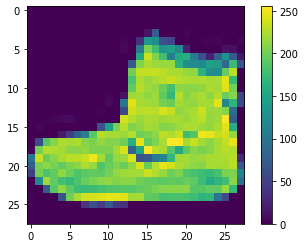

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

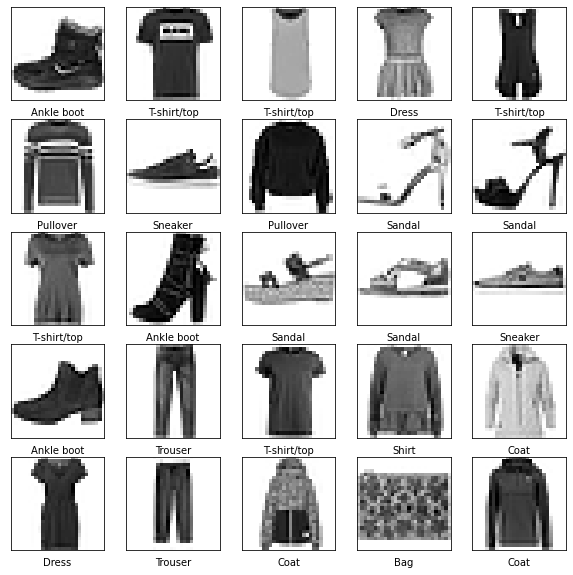

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-05-17 23:18:45.236405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4941 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3692 - accuracy: 0.8674
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3333 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3120 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2937 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2791 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2650 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2538 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2463 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.23

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3461 - accuracy: 0.8848 - 2s/epoch - 5ms/step

Test accuracy: 0.8848000168800354


In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [21]:
predictions[0]

array([7.62795551e-08, 1.14145284e-10, 2.16195879e-08, 2.48076972e-08,
       8.79010731e-09, 1.82430202e-03, 4.22952837e-08, 8.39968175e-02,
       3.53709140e-07, 9.14178431e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

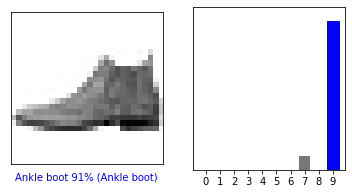

In [25]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

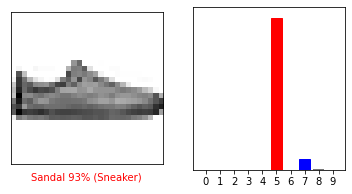

In [26]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

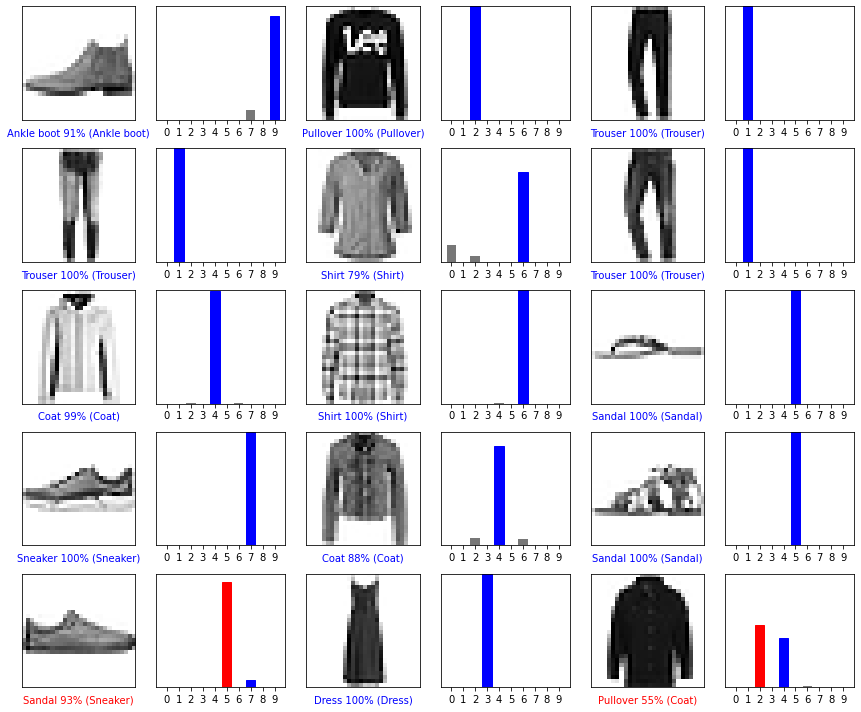

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[1.0966872e-05 3.7076839e-15 9.9949074e-01 5.2609983e-10 7.1809998e-05
  6.3603007e-13 4.2640723e-04 6.5317760e-14 1.5856073e-12 2.4284780e-10]]


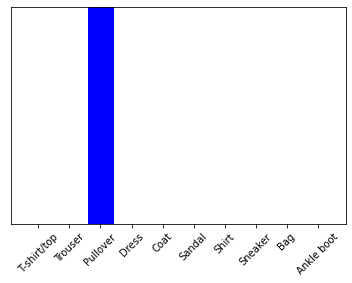

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2

In [33]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.